## scANVI analysis for healthy PBMC pilot study (Cai 2020 and Cai 2022)

**Objective**: Run scANVI analysis for label transfer for healthy PBMCs [Cai 2020 and Cai 2022]


- **Developed by**: Mairi McClean

- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**

- v230317

- Following this tutorial: https://docs.scvi-tools.org/en/stable/tutorials/notebooks/scarches_scvi_tools.html
> "This particular workflow is useful in the case where a model is trained on some data (called reference here) and new samples are received (called query)."



In [1]:
# Sanity check
import os 
os.write(1, b"text\n")

text


5

### Import modules 

In [2]:
import sys

from scvi_colab import install

install()

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    %pip install --quiet scrublet

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(


In [3]:
import sys
import warnings

import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import scvi



Global seed set to 0
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [4]:
warnings.simplefilter(action="ignore", category=FutureWarning)


sc.set_figure_params(figsize=(4, 4))
scvi.settings.seed = 94705

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

Global seed set to 94705


### Read in and prepare data
- Following steps from scVI portion of tutorial

In [5]:
adata_ref = sc.read_h5ad('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/yoshida_2021/meyer_nikolic_covid_pbmc.cellxgene.20210813.h5ad')
adata_ref

AnnData object with n_obs × n_vars = 422220 × 33751
    obs: 'patient_id', 'Ethnicity', 'BMI', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_fullNames', 'Age_group', 'COVID_severity', 'COVID_status', 'Group', 'Sex', 'Smoker', 'sample_id', 'sequencing_library', 'Protein_modality_weight'
    var: 'name'
    obsm: 'X_ umap (wnn derived)', 'X_umap (after harmony ADT)', 'X_umap (after harmony RNA)', 'X_umap (before harmony ADT)', 'X_umap (before harmony RNA)'

In [6]:
adata_ref.obs

patient_id Ethnicity  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...        AN3       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...        AN5       EUR   
...                                                       ...       ...   
S28_TTTGTCAGTTCTGTTT-1                                    PC9       EUR   
S28_TTTGTCATCAACCAAC-1                                    PC9       EUR   
S28_TTTGTCATCATTATCC-1                                    PC9       EUR   
S28_TTTGTCATCCTATGTT-1                                    PC9       EUR   
S28_TTTGTCATCTCAAGTG-1                                    PC2       EUR   

                                                        BMI annotation_broad  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...  Unknown         Monocyte   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...  Unknown           T CD4+   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...  Unknown           T CD4+   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...  Unknown           T CD8+   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...  Unknown           T CD4+   
...                                                     ...              ...   
S28_TTTGTCAGTTCTGTTT-1                                27.17               NK   
S28_TTTGTCATCAACCAAC-1                                27.17         Monocyte   
S28_TTTGTCATCATTATCC-1                                27.17         Monocyte   
S28_TTTGTCATCCTATGTT-1                                27.17               DC   
S28_TTTGTCATCTCAAGTG-1                                 36.9           T CD8+   

                                                   annotation_detailed  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...       Monocyte CD14   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...        T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...        T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...         T CD8 naive   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...         T CD4 naive   
...                                                                ...   
S28_TTTGTCAGTTCTGTTT-1                                              NK   
S28_TTTGTCATCAACCAAC-1                                   Monocyte CD14   
S28_TTTGTCATCATTATCC-1                                   Monocyte CD14   
S28_TTTGTCATCCTATGTT-1                                             pDC   
S28_TTTGTCATCTCAAGTG-1                                       T CD8 CTL   

                                                   annotation_detailed_fullNames  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...            Classical monocyte   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...                  T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...                  T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...                   T CD8 naive   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...                   T CD4 naive   
...                                                                          ...   
S28_TTTGTCAGTTCTGTTT-1                                                        NK   
S28_TTTGTCATCAACCAAC-1                                        Classical monocyte   
S28_TTTGTCATCATTATCC-1                                        Classical monocyte   
S28_TTTGTCATCCTATGTT-1                                                       pDC   
S28_TTTGTCATCTCAAGTG-1                                                 T CD8 CTL   

                                                   Age_group COVID_severity  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...     Adult        Healthy   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...     Adult        Healthy   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...    

- Filter query dataset to online include healthy cells

In [7]:
adata_ref.obs['COVID_status'].value_counts()

Healthy          173684
COVID-19         151312
Post-COVID-19     97224
Name: COVID_status, dtype: int64

In [8]:
adata_ref_new = adata_ref[~adata_ref.obs['COVID_status'].isin(['COVID-19', 'Post-COVID-19']),:]
adata_ref_new

View of AnnData object with n_obs × n_vars = 173684 × 33751
    obs: 'patient_id', 'Ethnicity', 'BMI', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_fullNames', 'Age_group', 'COVID_severity', 'COVID_status', 'Group', 'Sex', 'Smoker', 'sample_id', 'sequencing_library', 'Protein_modality_weight'
    var: 'name'
    obsm: 'X_ umap (wnn derived)', 'X_umap (after harmony ADT)', 'X_umap (after harmony RNA)', 'X_umap (before harmony ADT)', 'X_umap (before harmony RNA)'

In [9]:
adata_ref_new.obs['COVID_status'].value_counts()

Healthy    173684
Name: COVID_status, dtype: int64

- Read in query data

In [11]:
# Note: Query data is that of only Cai, not the Cai+Yoshida data, but clustered following scvi. This is not the correct data object?

# adata_query = sc.read_h5ad('/Volumes/Lacie/data_lake/Mairi_example/processed_files/scvi/post_sccaf/CaiY_healthy_scRNA_PBMC_mm230316_scVI-clustered.raw.h5ad')

adata_query_2020 = sc.read_h5ad('/Volumes/LaCie/data_lake/Mairi_example/processed_files/abridged_qc/human/Cai2020_scRNA_PBMC_mm230315_qcd.h5ad')
adata_query_2020

AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors'
    layers: 'counts', 'sqrt_norm'

In [12]:
adata_query_2022 = sc.read_h5ad('/Volumes/LaCie/data_lake/Mairi_example/processed_files/abridged_qc/human/Cai2022_scRNA_PBMC_mm230315_qcd.h5ad')
adata_query_2022

AnnData object with n_obs × n_vars = 25417 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

- Concatenate both query datasets


In [13]:
adata_query = adata_query_2020.concatenate(adata_query_2022, join='inner', batch_categories=['2020', '2022'], batch_key='year')

- Concatenate anndata objects

In [14]:
adata_healthy = adata_ref_new.concatenate(adata_query, join="inner", batch_categories=['reference', 'query'], batch_key='dataset')

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [15]:
adata_healthy

AnnData object with n_obs × n_vars = 272247 × 22792
    obs: 'patient_id', 'Ethnicity', 'BMI', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_fullNames', 'Age_group', 'COVID_severity', 'COVID_status', 'Group', 'Sex', 'Smoker', 'sample_id', 'sequencing_library', 'Protein_modality_weight', 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets', 'object', 'protocol', 'year', 'dataset'
    var: 'gene_id-query', 'mt-query', 'ribo-query', 'n_cells_by_counts-2020-query', 'mean_counts-2020-query', 'pct_dropout_by_counts-2020-query', 'total_counts-2020-query', 'n_cells_by_counts-2022-query', 'mean_counts-2022-query', 'pct_dropout_by_counts-2022-query', 'total_counts-2022-query', 'name-refe

In [16]:
adata_healthy.obs

patient_id Ethnicity  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...        AN3       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...        AN5       EUR   
...                                                       ...       ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   

                                                        BMI annotation_broad  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...  Unknown         Monocyte   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...  Unknown           T CD4+   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...  Unknown           T CD4+   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...  Unknown           T CD8+   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...  Unknown           T CD4+   
...                                                     ...              ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...      NaN              NaN   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...      NaN              NaN   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...      NaN              NaN   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...      NaN              NaN   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...      NaN              NaN   

                                                   annotation_detailed  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...       Monocyte CD14   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...        T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...        T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...         T CD8 naive   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...         T CD4 naive   
...                                                                ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...                 NaN   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...                 NaN   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...                 NaN   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...                 NaN   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...                 NaN   

                                                   annotation_detailed_fullNames  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...            Classical monocyte   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...                  T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...                  T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...                   T CD8 naive   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...                   T CD4 naive   
...                                                                          ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...                           NaN   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...                           NaN   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...                           NaN   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...                           NaN   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...                           NaN   

                                                   Age_group COVID_severity  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...     Adult        Healthy   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...     Adult        Healthy   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...    

In [17]:
print(adata_healthy.obs.dtypes)

patient_id                       category
Ethnicity                        category
BMI                              category
annotation_broad                 category
annotation_detailed              category
annotation_detailed_fullNames    category
Age_group                        category
COVID_severity                   category
COVID_status                     category
Group                            category
Sex                              category
Smoker                           category
sample_id                        category
sequencing_library               category
Protein_modality_weight           float64
study                              object
individual                         object
sample                             object
tissue                           category
donor                              object
age                              category
gender                           category
status                           category
data_type                        c

In [18]:
adata_healthy.obs['annotation_broad'].value_counts()

T CD4+       49415
T CD8+       34110
Monocyte     28637
B            26132
NK           21871
T reg         3251
T g/d         3183
MAIT          2213
DC            2151
Cycling       1012
Platelets      626
HPC            416
Plasma         352
ILC            199
RBC            106
Baso/Eos        10
Name: annotation_broad, dtype: int64

In [21]:
adata_healthy.obs["annotation_broad"] = adata_healthy.obs["annotation_broad"].cat.add_categories("unknown").fillna("unknown")

In [19]:
adata_healthy.obs["annotation_detailed"] = adata_healthy.obs["annotation_detailed"].cat.add_categories("unknown").fillna("unknown")


In [20]:
adata_healthy.obs["annotation_detailed_fullNames"] = adata_healthy.obs["annotation_detailed_fullNames"].cat.add_categories("unknown").fillna("unknown")


In [22]:
adata_healthy.obs

patient_id Ethnicity  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...        AN3       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...        AN5       EUR   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...        AN5       EUR   
...                                                       ...       ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN   

                                                        BMI annotation_broad  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...  Unknown         Monocyte   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...  Unknown           T CD4+   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...  Unknown           T CD4+   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...  Unknown           T CD8+   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...  Unknown           T CD4+   
...                                                     ...              ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...      NaN          unknown   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...      NaN          unknown   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...      NaN          unknown   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...      NaN          unknown   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...      NaN          unknown   

                                                   annotation_detailed  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...       Monocyte CD14   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...        T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...        T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...         T CD8 naive   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...         T CD4 naive   
...                                                                ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...             unknown   

                                                   annotation_detailed_fullNames  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...            Classical monocyte   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...                  T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...                  T CD4 helper   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTATAG...                   T CD8 naive   
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGC...                   T CD4 naive   
...                                                                          ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   

                                                   Age_group COVID_severity  \
CV001_KM10202384-CV001_KM10202394_AAACCTGAGGCAG...     Adult        Healthy   
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTC...     Adult        Healthy   
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATG...    

- Rename cell type labels column

In [23]:
adata_healthy.obs["labels_scanvi"] = adata_healthy.obs["annotation_broad"].values

In [24]:
adata_healthy.obs['labels_scanvi'].value_counts()

unknown      98563
T CD4+       49415
T CD8+       34110
Monocyte     28637
B            26132
NK           21871
T reg         3251
T g/d         3183
MAIT          2213
DC            2151
Cycling       1012
Platelets      626
HPC            416
Plasma         352
ILC            199
RBC            106
Baso/Eos        10
Name: labels_scanvi, dtype: int64

- Filter genes

In [27]:
# Save counts in layer

adata_healthy.layers['counts'] = adata_healthy.X.copy()
adata_healthy

AnnData object with n_obs × n_vars = 272247 × 22792
    obs: 'patient_id', 'Ethnicity', 'BMI', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_fullNames', 'Age_group', 'COVID_severity', 'COVID_status', 'Group', 'Sex', 'Smoker', 'sample_id', 'sequencing_library', 'Protein_modality_weight', 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets', 'object', 'protocol', 'year', 'dataset', 'labels_scanvi'
    var: 'gene_id-query', 'mt-query', 'ribo-query', 'n_cells_by_counts-2020-query', 'mean_counts-2020-query', 'pct_dropout_by_counts-2020-query', 'total_counts-2020-query', 'n_cells_by_counts-2022-query', 'mean_counts-2022-query', 'pct_dropout_by_counts-2022-query', 'total_counts-2022-q

In [28]:
# Note: For best practices of how/when to perform feature selection, 
# please refer to the model-specific tutorial. For scVI, we recommend anywhere from 1,000 to 10,000 HVGs, but it will be context-dependent.

sc.pp.highly_variable_genes(
    adata_healthy,
    n_top_genes=1200,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="dataset",
)

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


- Set labels and prepare adata subsets for model training

In [29]:
# Taken from Anna's notebook

condition_key = 'dataset'
cell_type_key = 'labels_scanvi'
target_conditions = ['query']

In [33]:
from scarches.dataset.trvae.data_handling import remove_sparsity

In [37]:
# Taken from Anna's notebook

adata_healthy = remove_sparsity(adata_healthy)
source_adata = adata_healthy[~adata_healthy.obs[condition_key].isin(target_conditions)].copy()
target_adata = adata_healthy[adata_healthy.obs[condition_key].isin(target_conditions)].copy()

### Train reference

> From tutorial: SCANVI tends to perform better in situations where it has been initialized using a pre-trained SCVI model. 

- scVI model

In [41]:
scvi.model.SCVI.setup_anndata(source_adata, batch_key="dataset", labels_key = 'labels_scanvi')

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [42]:
# Added for sarches params following tutorial; check if we require it?
arches_params = dict(
    use_layer_norm="both",
    use_batch_norm="none",
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
)

vae_ref = scvi.model.SCVI(source_adata, **arches_params)
vae_ref.train()

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/46:   0%|          | 0/46 [00:00<?, ?it/s]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/46:   2%|▏         | 1/46 [00:16<12:24, 16.54s/it, loss=155, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/46:   4%|▍         | 2/46 [00:32<11:56, 16.29s/it, loss=148, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/46:   7%|▋         | 3/46 [00:48<11:35, 16.18s/it, loss=143, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/46:   9%|▊         | 4/46 [01:04<11:16, 16.12s/it, loss=142, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/46:  11%|█         | 5/46 [01:20<10:59, 16.09s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/46:  13%|█▎        | 6/46 [01:36<10:42, 16.06s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/46:  15%|█▌        | 7/46 [01:52<10:26, 16.06s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/46:  17%|█▋        | 8/46 [02:08<10:10, 16.06s/it, loss=142, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/46:  20%|█▉        | 9/46 [02:25<09:54, 16.08s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/46:  22%|██▏       | 10/46 [02:41<09:38, 16.07s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/46:  24%|██▍       | 11/46 [02:57<09:22, 16.08s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/46:  26%|██▌       | 12/46 [03:13<09:07, 16.11s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/46:  28%|██▊       | 13/46 [03:29<08:51, 16.11s/it, loss=142, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/46:  30%|███       | 14/46 [03:45<08:36, 16.15s/it, loss=141, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/46:  33%|███▎      | 15/46 [04:01<08:20, 16.16s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/46:  35%|███▍      | 16/46 [04:18<08:04, 16.15s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/46:  37%|███▋      | 17/46 [04:34<07:48, 16.14s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/46:  39%|███▉      | 18/46 [04:50<07:32, 16.15s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/46:  41%|████▏     | 19/46 [05:06<07:16, 16.15s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 21/46:  43%|████▎     | 20/46 [05:22<06:59, 16.14s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 22/46:  46%|████▌     | 21/46 [05:38<06:43, 16.15s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 23/46:  48%|████▊     | 22/46 [05:54<06:27, 16.16s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/46:  50%|█████     | 23/46 [06:11<06:12, 16.18s/it, loss=136, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 25/46:  52%|█████▏    | 24/46 [06:27<05:55, 16.16s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 26/46:  54%|█████▍    | 25/46 [06:43<05:39, 16.15s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 27/46:  57%|█████▋    | 26/46 [06:59<05:22, 16.13s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 28/46:  59%|█████▊    | 27/46 [07:15<05:06, 16.12s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 29/46:  61%|██████    | 28/46 [07:31<04:49, 16.10s/it, loss=136, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 30/46:  63%|██████▎   | 29/46 [07:47<04:32, 16.06s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 31/46:  65%|██████▌   | 30/46 [08:03<04:16, 16.06s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 32/46:  67%|██████▋   | 31/46 [08:19<04:00, 16.05s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 33/46:  70%|██████▉   | 32/46 [08:35<03:44, 16.02s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 34/46:  72%|███████▏  | 33/46 [08:51<03:27, 16.00s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 35/46:  74%|███████▍  | 34/46 [09:07<03:12, 16.01s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 36/46:  76%|███████▌  | 35/46 [09:23<02:56, 16.02s/it, loss=138, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 37/46:  78%|███████▊  | 36/46 [09:40<02:41, 16.19s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 38/46:  80%|████████  | 37/46 [09:59<02:32, 17.00s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 39/46:  83%|████████▎ | 38/46 [10:17<02:19, 17.50s/it, loss=136, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 40/46:  85%|████████▍ | 39/46 [10:34<02:00, 17.24s/it, loss=141, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 41/46:  87%|████████▋ | 40/46 [10:50<01:40, 16.83s/it, loss=141, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 42/46:  89%|████████▉ | 41/46 [11:06<01:22, 16.55s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 43/46:  91%|█████████▏| 42/46 [11:21<01:05, 16.32s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 44/46:  93%|█████████▎| 43/46 [11:37<00:48, 16.17s/it, loss=137, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/46:  96%|█████████▌| 44/46 [11:53<00:32, 16.17s/it, loss=139, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 46/46:  98%|█████████▊| 45/46 [12:09<00:16, 16.06s/it, loss=140, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 46/46: 100%|██████████| 46/46 [12:25<00:00, 15.95s/it, loss=141, v_num=1]

`Trainer.fit` stopped: `max_epochs=46` reached.


Epoch 46/46: 100%|██████████| 46/46 [12:25<00:00, 16.21s/it, loss=141, v_num=1]


In [43]:
source_adata.obsm["X_scVI"] = vae_ref.get_latent_representation()
sc.pp.neighbors(source_adata, use_rep="X_scVI")
sc.tl.leiden(source_adata)
sc.tl.umap(source_adata)

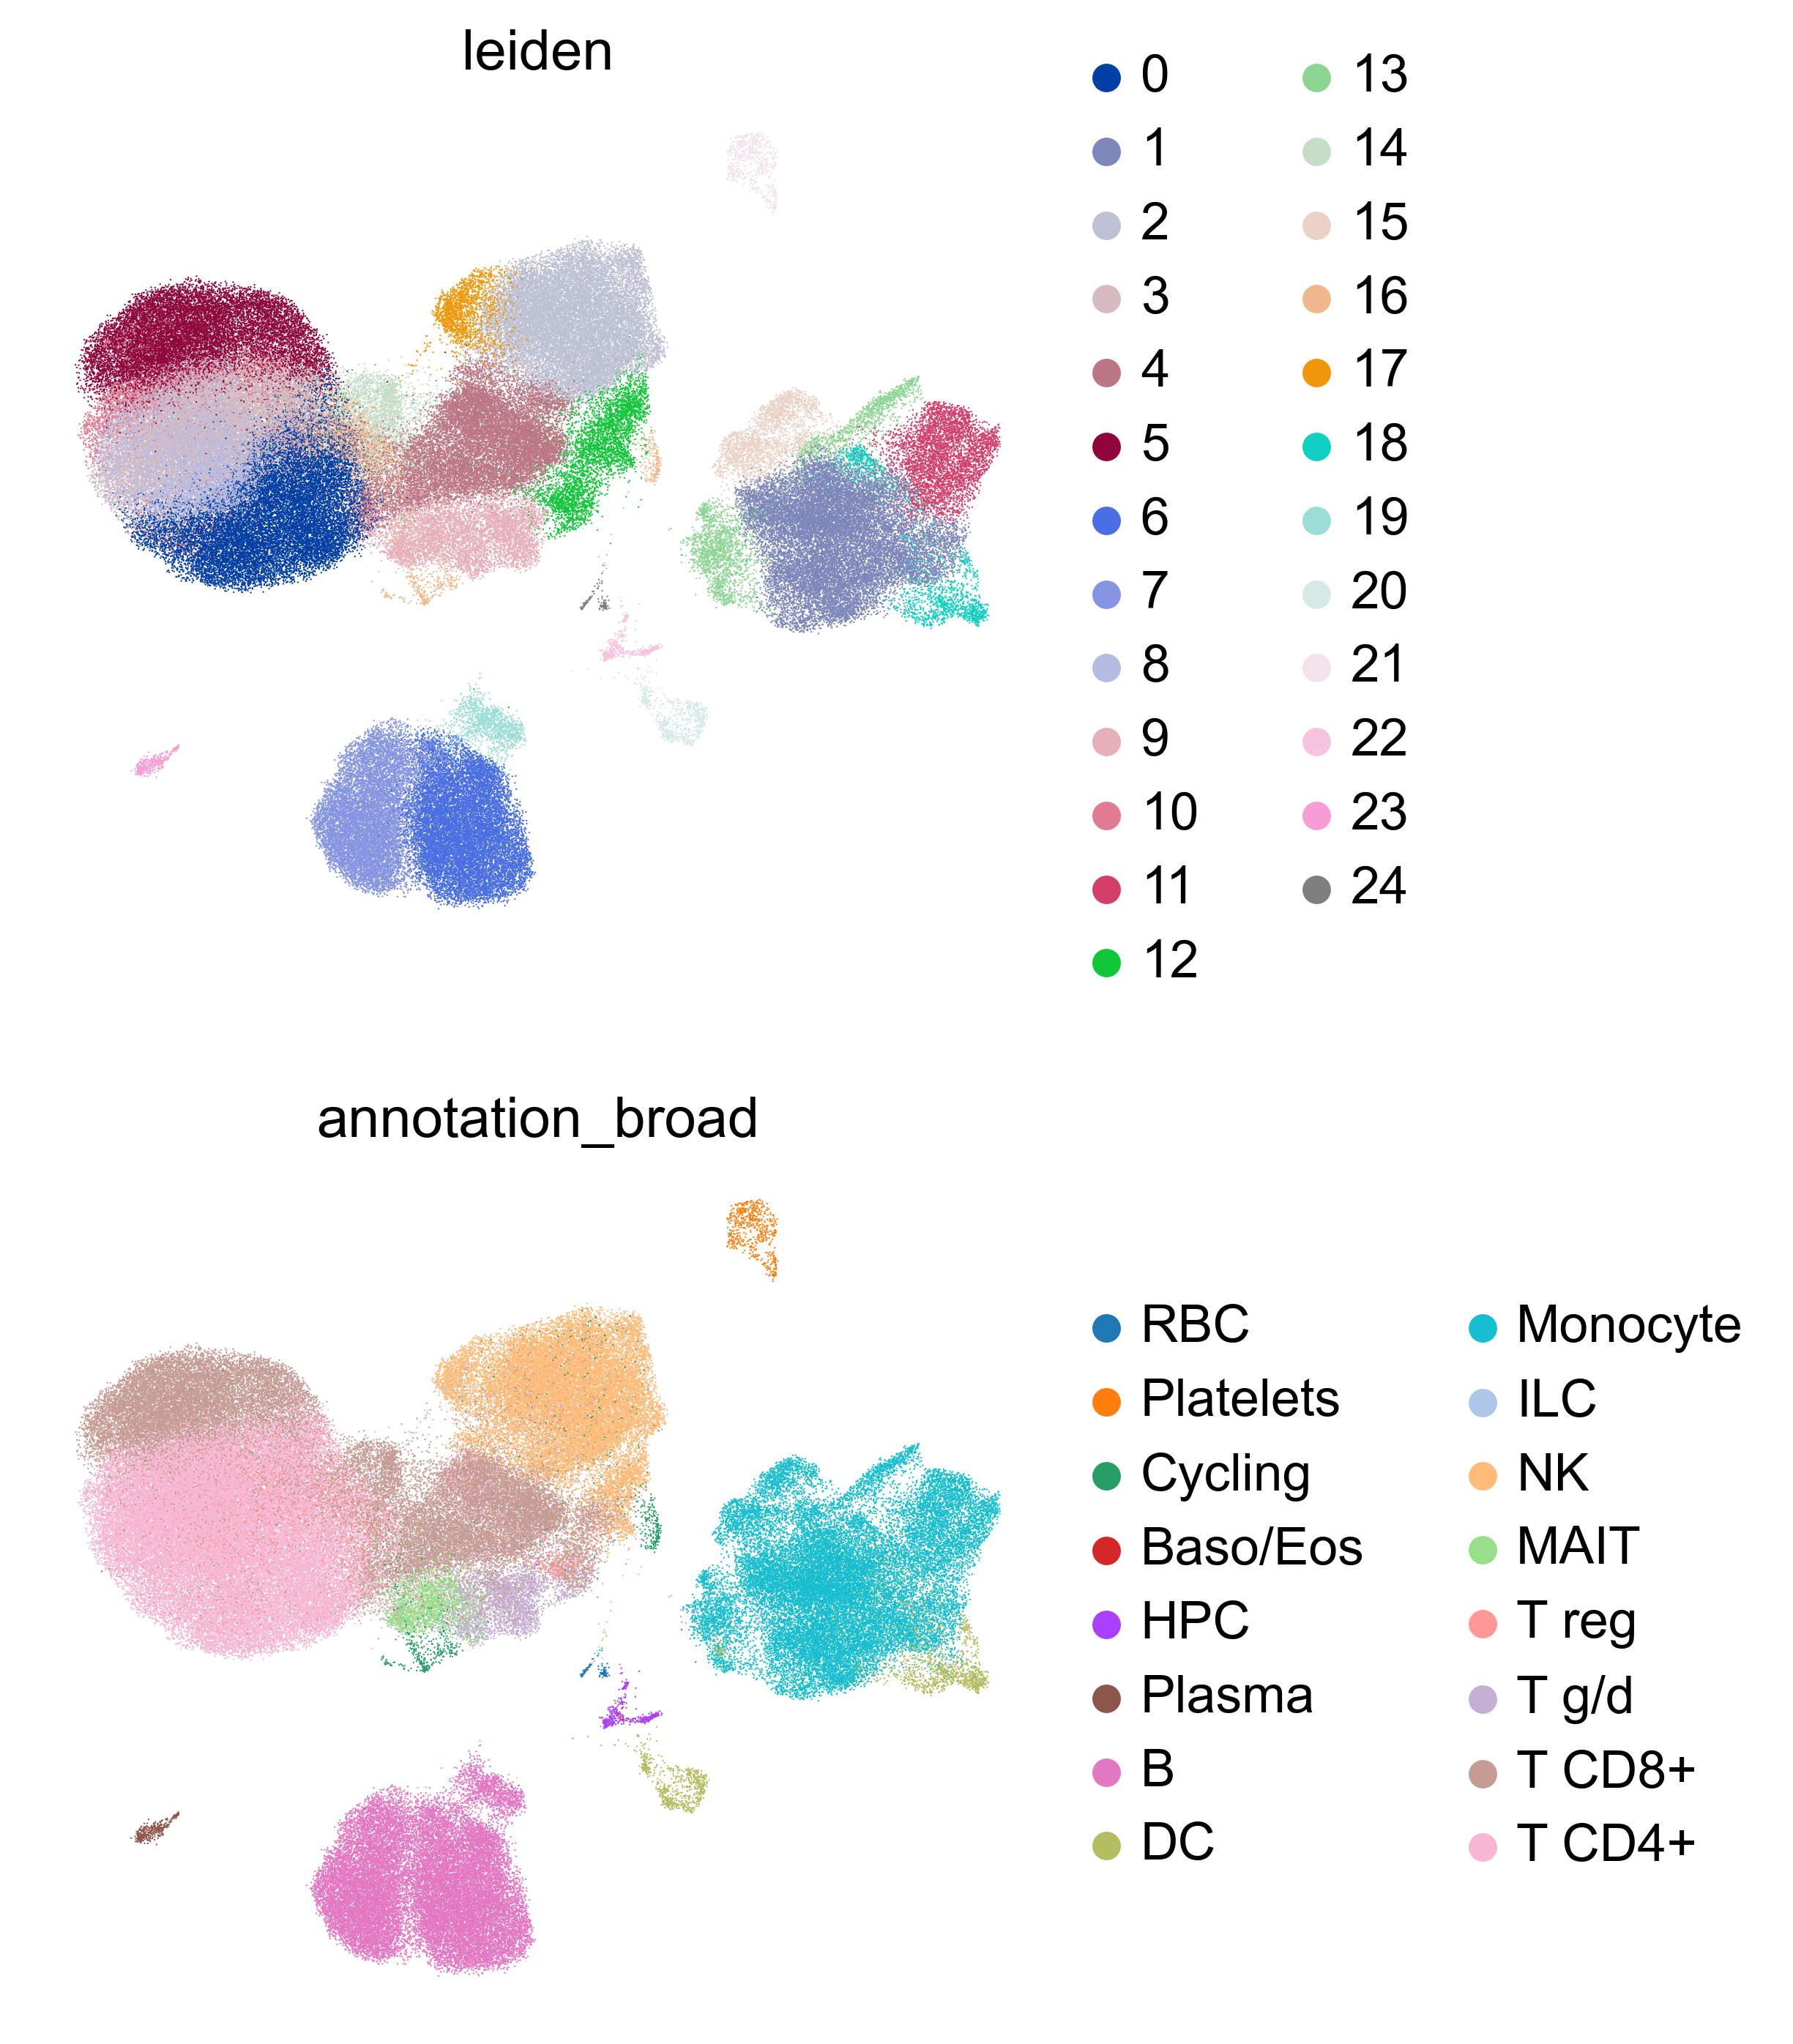

In [45]:
sc.pl.umap(
    source_adata,
    color=["leiden", "annotation_broad"],
    frameon=False,
    ncols=1,
)

### Update with query

- scANVI model

In [46]:
# unlabeled category does not exist in adata.obs[labels_key]
# so all cells are treated as labeled
vae_ref_scanvi = scvi.model.SCANVI.from_scvi_model(
    vae_ref,
    unlabeled_category="Unknown",
    labels_key="labels_scanvi",
)

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [48]:
# Model metric
print("Labelled Indices: ", len(vae_ref_scanvi._labeled_indices))
print("Unlabelled Indices: ", len(vae_ref_scanvi._unlabeled_indices))

Labelled Indices:  173684
Unlabelled Indices:  0


In [49]:
vae_ref_scanvi.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/20:   5%|▌         | 1/20 [00:36<11:35, 36.60s/it, loss=234, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/20:  10%|█         | 2/20 [01:12<10:56, 36.45s/it, loss=231, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/20:  15%|█▌        | 3/20 [01:49<10:20, 36.49s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/20:  20%|██        | 4/20 [02:25<09:40, 36.28s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/20:  25%|██▌       | 5/20 [03:01<09:03, 36.26s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/20:  30%|███       | 6/20 [03:39<08:32, 36.64s/it, loss=233, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/20:  35%|███▌      | 7/20 [04:15<07:57, 36.74s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/20:  40%|████      | 8/20 [04:51<07:16, 36.38s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/20:  45%|████▌     | 9/20 [05:26<06:33, 35.79s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/20:  50%|█████     | 10/20 [06:00<05:52, 35.27s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/20:  55%|█████▌    | 11/20 [06:34<05:13, 34.82s/it, loss=229, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/20:  60%|██████    | 12/20 [07:07<04:35, 34.38s/it, loss=229, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/20:  65%|██████▌   | 13/20 [07:41<03:59, 34.18s/it, loss=230, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/20:  70%|███████   | 14/20 [08:13<03:22, 33.74s/it, loss=231, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/20:  75%|███████▌  | 15/20 [08:47<02:48, 33.66s/it, loss=231, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/20:  80%|████████  | 16/20 [09:20<02:14, 33.61s/it, loss=229, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/20:  85%|████████▌ | 17/20 [09:53<01:40, 33.46s/it, loss=232, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/20:  90%|█████████ | 18/20 [10:27<01:07, 33.64s/it, loss=231, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/20:  95%|█████████▌| 19/20 [11:01<00:33, 33.68s/it, loss=231, v_num=1]

/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/mairi.mcclean/mambaforge/envs/scanvi_local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:476: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/20: 100%|██████████| 20/20 [11:34<00:00, 33.54s/it, loss=231, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [11:34<00:00, 34.75s/it, loss=231, v_num=1]


In [50]:
source_adata.obsm["X_scANVI"] = vae_ref_scanvi.get_latent_representation()
sc.pp.neighbors(source_adata, use_rep="X_scANVI")
sc.tl.leiden(source_adata)
sc.tl.umap(source_adata)


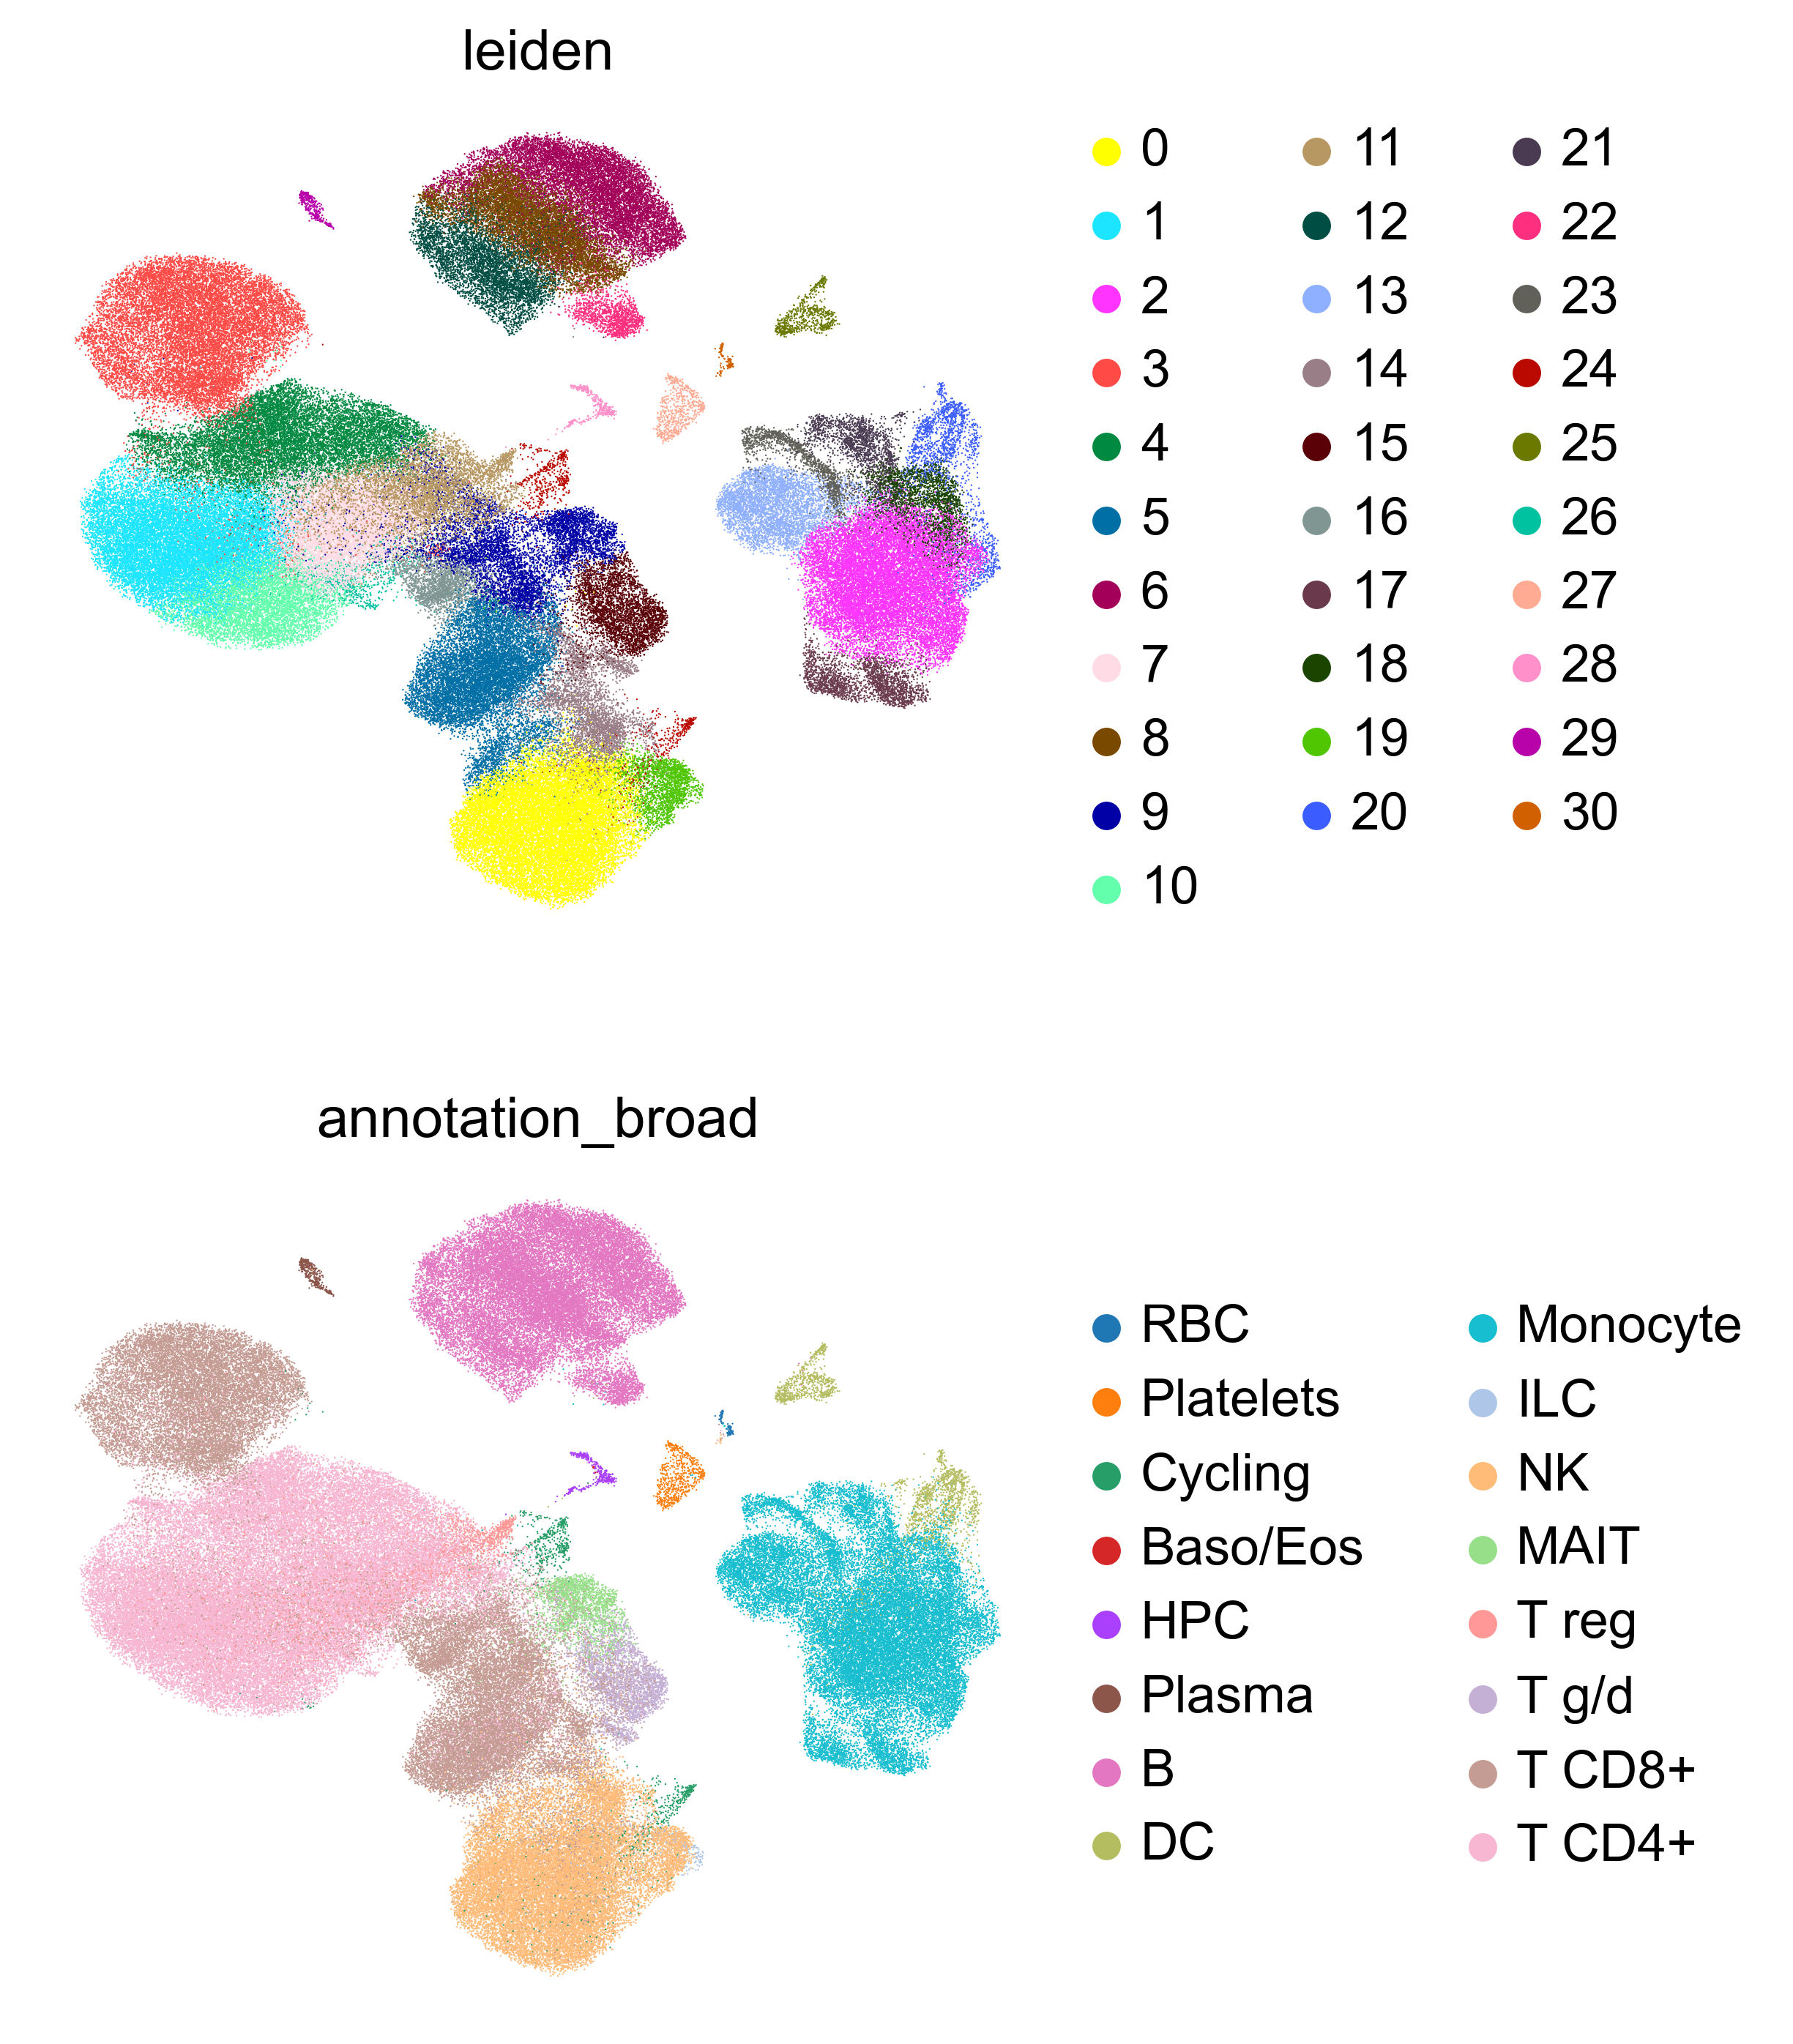

In [51]:
sc.pl.umap(
    source_adata,
    color=["leiden", "annotation_broad"],
    frameon=False,
    ncols=1,
)

### Create Anndata file of latent representation

In [52]:
source_adata.obs['predictions'] = vae_ref_scanvi.predict()

In [53]:
print("Acc: {}".format(np.mean(source_adata.obs.predictions == source_adata.obs.annotation_broad)))

Acc: 0.8299382787130651


### Update with query

Question: Do you cluster your query data before entering it into the scanvi model?

In [54]:
dir_path_scan = "/Volumes/LaCie/data_lake/Mairi_example/processed_files/scanvi/models/"
vae_ref_scanvi.save(dir_path_scan, overwrite=True)

In [55]:
# again a no-op in this tutorial, but good practice to use
scvi.model.SCANVI.prepare_query_anndata(target_adata, dir_path_scan)

INFO     File /Volumes/LaCie/data_lake/Mairi_example/processed_files/scanvi/models/model.pt already downloaded     
INFO     Found 100.0% reference vars in query data.                                                                


In [64]:
target_adata.obs

patient_id Ethnicity  BMI  \
AAACCTGAGAACAATC-acTB3-2020-query                         NaN       NaN  NaN   
AAACCTGAGAAGGTGA-acTB3-2020-query                         NaN       NaN  NaN   
AAACCTGAGATCTGCT-acTB3-2020-query                         NaN       NaN  NaN   
AAACCTGAGCACAGGT-acTB3-2020-query                         NaN       NaN  NaN   
AAACCTGAGCGTGAAC-acTB3-2020-query                         NaN       NaN  NaN   
...                                                       ...       ...  ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN  NaN   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN  NaN   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN  NaN   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN  NaN   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...        NaN       NaN  NaN   

                                                   annotation_broad  \
AAACCTGAGAACAATC-acTB3-2020-query                           unknown   
AAACCTGAGAAGGTGA-acTB3-2020-query                           unknown   
AAACCTGAGATCTGCT-acTB3-2020-query                           unknown   
AAACCTGAGCACAGGT-acTB3-2020-query                           unknown   
AAACCTGAGCGTGAAC-acTB3-2020-query                           unknown   
...                                                             ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...          unknown   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...          unknown   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...          unknown   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...          unknown   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...          unknown   

                                                   annotation_detailed  \
AAACCTGAGAACAATC-acTB3-2020-query                              unknown   
AAACCTGAGAAGGTGA-acTB3-2020-query                              unknown   
AAACCTGAGATCTGCT-acTB3-2020-query                              unknown   
AAACCTGAGCACAGGT-acTB3-2020-query                              unknown   
AAACCTGAGCGTGAAC-acTB3-2020-query                              unknown   
...                                                                ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...             unknown   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...             unknown   

                                                   annotation_detailed_fullNames  \
AAACCTGAGAACAATC-acTB3-2020-query                                        unknown   
AAACCTGAGAAGGTGA-acTB3-2020-query                                        unknown   
AAACCTGAGATCTGCT-acTB3-2020-query                                        unknown   
AAACCTGAGCACAGGT-acTB3-2020-query                                        unknown   
AAACCTGAGCGTGAAC-acTB3-2020-query                                        unknown   
...                                                                          ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq-2022-q...                       unknown   

                                                   Age_group COVID_severity  \
AAACCTGAGAACAATC-acTB3-2020-query                        NaN            NaN   
AAACCTGAGAAGGTGA-acTB3-2020-query                        NaN            NaN   
AAACCTGAGATCTGCT-acTB3-2020-query                        NaN            NaN   
AAACCTGAGCACAGGT-acTB3-

In [66]:
vae_query = scvi.model.SCANVI.load_query_data(
    target_adata,
    dir_path_scan,
    freeze_dropout = True
)

INFO     File /Volumes/LaCie/data_lake/Mairi_example/processed_files/scanvi/models/model.pt already downloaded     


ValueError: Category unknown not found in source registry. Cannot transfer setup without `extend_categories = True`.

In [ ]:
# Code from Anna

vae_query._unlabeled_indices = np.arange(target_adata.n_obs)
vae_query._labeled_indices = []
print("Labelled Indices: ", len(vae_query._labeled_indices))
print("Unlabelled Indices: ", len(vae_query._unlabeled_indices))

In [ ]:
vae_q.train(
    max_epochs=100,
    plan_kwargs=dict(weight_decay=0.0),
    check_val_every_n_epoch=10,
)

In [ ]:
adata_query.obsm["X_scANVI"] = vae_q.get_latent_representation()
adata_query.obs["predictions"] = vae_q.predict()

In [ ]:
df = adata_query.obs.groupby(["celltype", "predictions"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

### Analyze reference and query

In [ ]:
adata_full = adata_query.concatenate(adata_ref)

In [ ]:
adata_full.obs.batch.cat.rename_categories(["Query", "Reference"], inplace=True)

In [ ]:
full_predictions = vae_q.predict(adata_full)
print(f"Acc: {np.mean(full_predictions == adata_full.obs.celltype)}")

adata_full.obs["predictions"] = full_predictions

In [ ]:
sc.pp.neighbors(adata_full, use_rep="X_scANVI")
sc.tl.leiden(adata_full)
sc.tl.umap(adata_full)

In [ ]:
sc.pl.umap(
    adata_full,
    color=["tech", "celltype"],
    frameon=False,
    ncols=1,
)

In [ ]:
ax = sc.pl.umap(
    adata_full,
    frameon=False,
    show=False,
)
sc.pl.umap(
    adata_full[: adata_query.n_obs],
    color=["predictions"],
    frameon=False,
    title="Query predictions",
    ax=ax,
    alpha=0.7,
)

ax = sc.pl.umap(
    adata_full,
    frameon=False,
    show=False,
)
sc.pl.umap(
    adata_full[: adata_query.n_obs],
    color=["celltype"],
    frameon=False,
    title="Query observed cell types",
    ax=ax,
    alpha=0.7,
)